In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [438]:
import seaborn as sns

In [439]:
from sklearn.model_selection import train_test_split

## Получение данных и первичный анализ

In [440]:
df = pd.read_csv("train.csv")

In [441]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [442]:
df.set_index('Id', drop=True)

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57
...,...,...,...,...,...,...,...,...,...,...,...
9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,83
9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,58
9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,62


In [443]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


Проверка на пустые или пропущенные значения

In [444]:
df.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

Анализ данных при помощи boxplot

Т.к. количество принаков относительно небюольшое, можно позволить выполнить аналлиз каждого признака при помози отдельного боксплот.

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


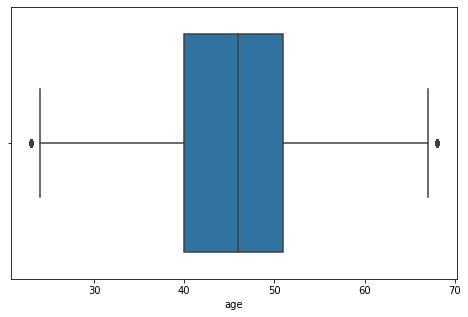

In [445]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['age'])
plt.xlabel('age')
plt.show()

Поле age содержит очень небольшое количество выбросов. Т.е. можно позволить оставить эти величины.

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


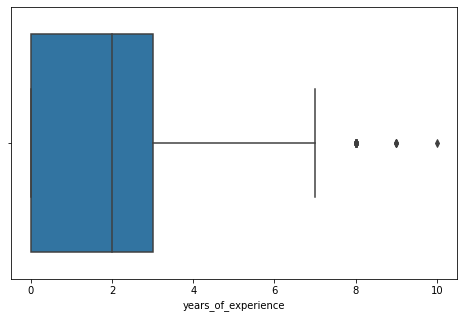

In [446]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['years_of_experience'])
plt.xlabel('years_of_experience')
plt.show()

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


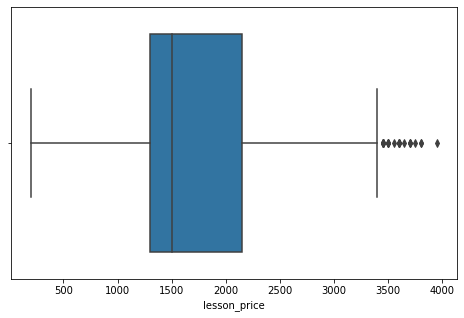

In [447]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['lesson_price'])
plt.xlabel('lesson_price')
plt.show()

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


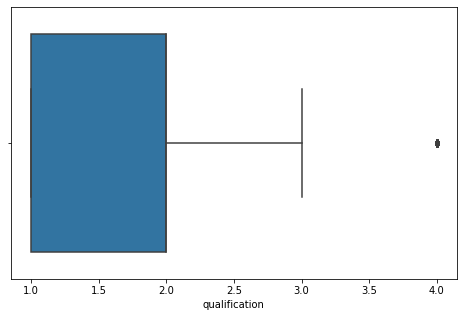

In [448]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['qualification'])
plt.xlabel('qualification')
plt.show()

<Figure size 576x360 with 0 Axes>

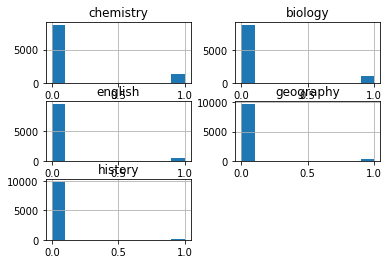

In [449]:
plt.figure(figsize=(8, 5))
df[['chemistry','biology','english','geography','history']].hist()

plt.xlabel('subjects')
plt.show()

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


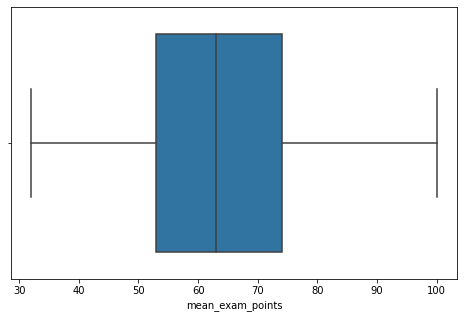

In [450]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['mean_exam_points'])
plt.xlabel('mean_exam_points')
plt.show()

Построим матрицу корреляцим для всех признаков с предположением, что зависимость линейная.

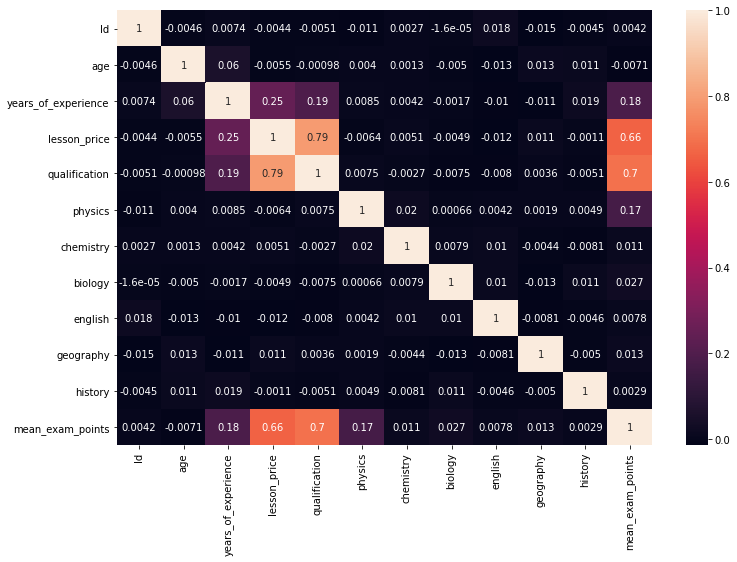

In [451]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

При условии применения линейной модели, значимая корреляция наблюдается только для двух признаков.

## Преобразование и очистка данных

Перед обучением можелей проведем нормализацию данных

In [453]:
def standard_scale(X):
    """Function is used for standartization"""
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [ ]:
def norm(X):
    return (X - X.min()) / (X.max() - X.min())

In [454]:
y = df_fill['mean_exam_points']

In [455]:
df_fill = df.drop(columns=['Id'])

In [456]:
X = df_fill.drop(columns=['mean_exam_points'])

In [457]:
df_fill.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [458]:
X = X.apply(standard_scale)

In [459]:
X.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,-0.730737,-1.121084,-0.569847,-0.908157,1.290930,-0.391477,-0.350825,-0.238205,5.490868,-0.140648
1,0.263801,1.135981,2.192654,1.616254,1.290930,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
2,-0.855055,-1.121084,-0.950881,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
3,0.015167,1.700247,-0.569847,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648
4,-0.357785,-0.556818,-0.379330,-0.908157,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648


In [460]:
X = X[['lesson_price', 'qualification']]

In [461]:
X.head()

,lesson_price,qualification
0,-0.569847,-0.908157
1,2.192654,1.616254
2,-0.950881,-0.908157
3,-0.569847,-0.908157
4,-0.379330,-0.908157


In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [463]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

## Построение и обучение модели

В качестве базовой модели примем случайный лес (возможно с градиентным бустингом), как обеспечсивающий (теореттически) наибольшую точность ответов.

In [464]:
np.random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0] # размер совпадает с исходной выборкой
    bootstrap = []
    
    for i in range(N):
        
        sample_index = np.random.randint(0, n_samples, size=n_samples)
        b_data = data[sample_index]
        b_labels = labels[sample_index]
        
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [465]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = list(range(len_sample))

    len_subsample = int(np.sqrt(len_sample))
    
    subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

    return subsample

In [466]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [467]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        #classes = {}  # сформируем словарь "класс: количество объектов"
        #for label in self.labels:
        #    if label not in classes:
        #        classes[label] = 0
        #    classes[label] += 1
            
        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        #prediction = max(classes, key=classes.get)
        prediction = self.labels.mean()
        return prediction        

In [468]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [469]:
# Расчет прироста

def gain(left_labels, right_labels, root_gini):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return root_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [470]:
# Разбиение датасета в узле

def split(data, labels, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [471]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf_samples = 5

    root_gini = gini(labels)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    feature_subsample_indices = get_subsample(n_features) # выбираем случайные признаки
    
    for index in feature_subsample_indices:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique(data[:, index])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
#             if len(true_data) < min_leaf_samples or len(false_data) < min_leaf_samples:
#                 continue
            
            current_gain = gain(true_labels, false_labels, root_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [472]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):
    global max_leaves, depth, num_leaves
    
    gain, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if (gain == 0): #or (num_leaves >= max_leaves - 1) or (depth >= depth - 1):
        return Leaf(data, labels)
    
    depth += 1
    
    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [473]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [474]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [475]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [476]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
#     print(predictions)

    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
#     print(predictions_per_object)

    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        #voted_predictions.append(max(set(obj), key=obj.count))
        voted_predictions.append(np.mean(obj))
        #print("obj", obj)
    
    return np.array(voted_predictions)

In [477]:
values = np.linspace(1, 50, 20, dtype=int)

In [478]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

In [479]:
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

In [480]:
%%time
result = []
#values = range(10, 20)
for n_trees in values:
    my_forest = random_forest(X_train_np, y_train_np, n_trees)
    # Получим ответы для обучающей выборки 
    y_train_pred = tree_vote(my_forest, X_train_np)
    # И получим ответы для тестовой выборки
    y_test_pred = tree_vote(my_forest, X_test_np)
    # Точность на обучающей выборке
    train_accuracy = calc_mse(y_train_np, y_train_pred)
    # Точность на тестовой выборке
    test_accuracy = calc_mse(y_test_np, y_test_pred)
    result.append([train_accuracy, test_accuracy, n_trees])

Wall time: 2min 13s


In [481]:
result_np = np.array(result)

Text(0.5, 0, '50')

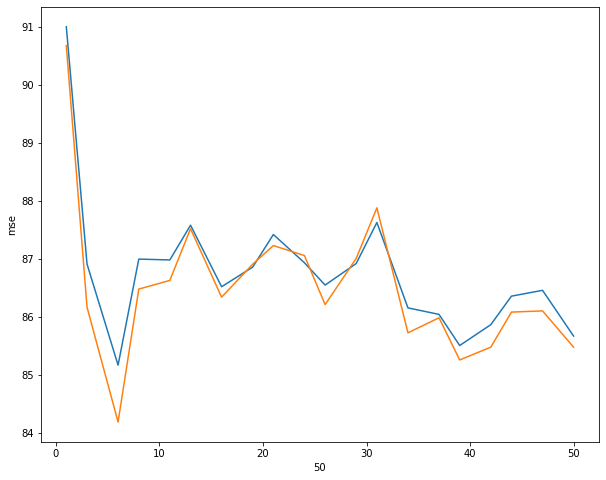

In [482]:
plt.figure(figsize=(10, 8))
plt.plot(result_np[:, 2], result_np[:, 0], label = 'train')
plt.plot(result_np[:, 2], result_np[:, 1], label = 'test')
plt.ylabel("mse")
plt.xlabel(n_trees)

In [484]:
depth = 100
num_leaves = 5
max_leaves = 10

In [485]:
depth

100

## Проверка данных на тестовой выборке и создание предсказания.

In [486]:
X_np = X.to_numpy()
y_np = y.to_numpy()

In [487]:
n_trees_final = 50

In [488]:
df_valid = pd.read_csv("test.csv")

In [489]:
df_valid.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [490]:
X_valid = df_valid.apply(standard_scale)

In [503]:
X_valid = X_valid[['lesson_price', 'qualification']]

In [504]:
X_valid_np = X_valid.to_numpy()

In [505]:
my_forest_final = random_forest(X_np, y_np, n_trees_final)

In [506]:
%time
y_pred = tree_vote(my_forest_final, X_valid_np)

Wall time: 0 ns


In [507]:
y_sub = pd.DataFrame(y_pred)

In [508]:
y_sub.head()

,0
0,58.567419
1,80.783794
2,60.925161
3,85.954857
4,85.907662


In [509]:
y_sub['Id'] = df_valid['Id']
y_sub.rename(columns={0:'mean_exam_points'}, inplace=True)

In [510]:
y_sub.head()

,mean_exam_points,Id
0,58.567419,10000
1,80.783794,10001
2,60.925161,10002
3,85.954857,10003
4,85.907662,10004


In [511]:
y_sub = y_sub.set_index(['Id'], drop=True)

In [512]:
y_sub.head()

,mean_exam_points
Id,
10000,58.567419
10001,80.783794
10002,60.925161
10003,85.954857
10004,85.907662


In [513]:
y_sub.rename(columns={0:'mean_exam_points'}, inplace=True)

In [514]:
y_sub.head()

,mean_exam_points
Id,
10000,58.567419
10001,80.783794
10002,60.925161
10003,85.954857
10004,85.907662


In [515]:
y_sub.to_csv('my_submission.csv')